In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')
%matplotlib inline

In [226]:
df = pd.read_csv('/Users/rabitt/Dropbox/MARL/repos/loopy/HLL_params_df.csv')

In [227]:
df.fillna(value=0, inplace=True)
df['min_contour_len'] = (df['min_contour_len_samples']/44100).round(decimals=4)

In [228]:
df = df[df['min_contour_len_samples'] <= 2205]
df = df[df['amplitude-threshold'] > 0]
df = df[df['tracking_update_threhold'] < 500]
df.describe()

,Unnamed: 0,accuracy-mean,accuracy-std,precision-mean,precision-std,recall-mean,recall-std,amplitude-threshold,f_cutoff,min_contour_len_samples,n_harmonics,tracking_gain,tracking_update_threhold,weighted-f3,weighted-f5,weighted-f10,min_contour_len
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.0,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,761.065617,0.192362,0.050822,0.377233,0.068996,0.385250,0.068601,0.043405,30.0,1064.748031,4.031496,0.001063,52.125984,0.354031,0.371600,0.381501,0.024141
std,448.332857,0.121555,0.031718,0.251546,0.042990,0.281694,0.041648,0.188457,0.0,943.145507,1.559033,0.001029,30.940433,0.240708,0.263326,0.276579,0.021390
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,30.0,0.000000,1.000000,0.000080,5.000000,0.000000,0.000000,0.000000,0.000000
25%,376.000000,0.087257,0.022961,0.207055,0.050283,0.093419,0.037018,0.000010,30.0,441.000000,3.000000,0.000500,20.000000,0.102372,0.096671,0.094235,0.010000
50%,741.000000,0.218131,0.059121,0.343845,0.073354,0.413538,0.081799,0.000100,30.0,441.000000,4.000000,0.001000,50.000000,0.425308,0.417987,0.414674,0.010000
75%,1158.000000,0.294101,0.070281,0.591349,0.094175,0.671038,0.094153,0.001000,30.0,2205.000000,5.000000,0.001000,80.000000,0.589147,0.641386,0.663597,0.050000
max,1489.000000,0.391061,0.132733,0.879874,0.368985,0.788827,0.159081,1.000000,30.0,2205.000000,6.000000,0.005000,100.000000,0.643794,0.703372,0.764370,0.050000


In [169]:
def get_param_results(joined_frames, param, metric):
    param_vals = list(set(joined_frames[param]))
    data = []
    for param_val in param_vals:
        val_data = joined_frames[joined_frames[param] == param_val][metric].values
        data.append(val_data)
    dat_means = np.array([np.mean(m) for m in data])
    dat_stds = np.array([np.std(m) for m in data])
    dat_max = np.array([np.max(m) for m in data])
    dat_idx = np.argsort(param_vals)
    return (
        np.array(param_vals)[dat_idx], dat_means[dat_idx],
        dat_stds[dat_idx], dat_max[dat_idx], [data[i] for i in dat_idx]
    )

In [232]:
x_dict = {
    'n_harmonics': '$H$',
    'amplitude-threshold': '$a_{min}$',
    'tracking_update_threhold': '$\epsilon_{max}$',
    'min_contour_len': '$n_{min}$ (seconds)',
    'tracking_gain': '$g$'
}

y_dict = {
    'weighted-f3': r'$F-3$',
    'weighted-f5': r'$F-5$',
    'weighted-f10': r'$F-10$',
    'recall-mean': 'recall'
}

def errbar_plot(param, metric, color='b', ylab=True):
    p, mu, sigma, dmax, dat = get_param_results(df, param, metric)
    xvals = range(len(p))
    plt.plot(xvals, dmax, 'o-', color=color)
    argmax_dmax = np.argmax(dmax)
    plt.plot(xvals[argmax_dmax], dmax[argmax_dmax], '*', color=color, markersize=15)
    plt.xticks(xvals, p)
    plt.xlim([-0.5, len(p) - 0.5])

    plt.xlabel(x_dict[param])
    if ylab:
        plt.ylabel(y_dict[metric])

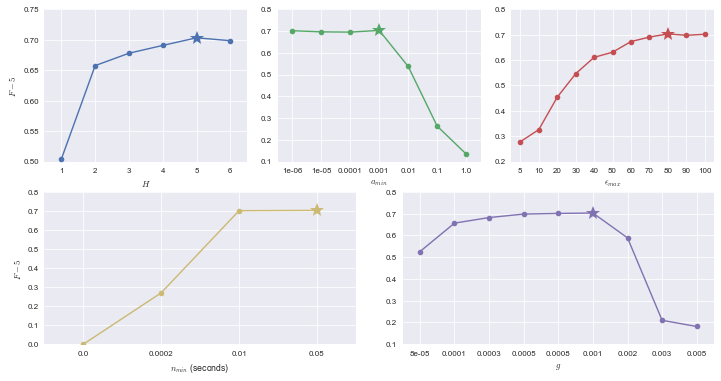

In [233]:
from matplotlib import figure
c1, c2, c3, c4, c5 = sns.color_palette('deep', 5)
col = 'weighted-f5' # 'recall-mean'#
spp = figure.SubplotParams(
    left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None
)
plt.figure(figsize=(12, 6), subplotpars=spp)

plt.subplot(2, 3, 1)
errbar_plot('n_harmonics', col, color=c1)

plt.subplot(2, 3, 2)
errbar_plot('amplitude-threshold', col, color=c2, ylab=False)
# plt.ylim([0.75, 0.85])

plt.subplot(2, 3, 3)
errbar_plot('tracking_update_threhold', col, color=c3, ylab=False)
# plt.ylim([0.75, 0.85])

plt.subplot(2, 2, 3)
errbar_plot('min_contour_len', col, color=c5)

plt.subplot(2, 2, 4)
errbar_plot('tracking_gain', col, color=c4, ylab=False)

plt.savefig('hll_tracking_params.pdf', format='pdf', bbox_inches='tight')

In [222]:
print df.ix[df['weighted-f5'].argmax()]

Unnamed: 0                   173.000000
accuracy-mean                  0.259639
accuracy-std                   0.043028
precision-mean                 0.287563
precision-std                  0.054787
recall-mean                    0.746552
recall-std                     0.051566
amplitude-threshold            0.001000
f_cutoff                      30.000000
min_contour_len_samples     2205.000000
n_harmonics                    5.000000
tracking_gain                  0.001000
tracking_update_threhold      80.000000
weighted-f3                    0.643794
weighted-f5                    0.703372
weighted-f10                   0.734938
min_contour_len                0.050000
Name: 173, dtype: float64


In [230]:
print df.ix[df['recall-mean'].argmax()]

Unnamed: 0                   677.000000
accuracy-mean                  0.177229
accuracy-std                   0.063858
precision-mean                 0.186411
precision-std                  0.068735
recall-mean                    0.788827
recall-std                     0.078675
amplitude-threshold            0.001000
f_cutoff                      30.000000
min_contour_len_samples     2205.000000
n_harmonics                    5.000000
tracking_gain                  0.000800
tracking_update_threhold     100.000000
weighted-f3                    0.596167
weighted-f5                    0.701620
weighted-f10                   0.764370
min_contour_len                0.050000
Name: 677, dtype: float64


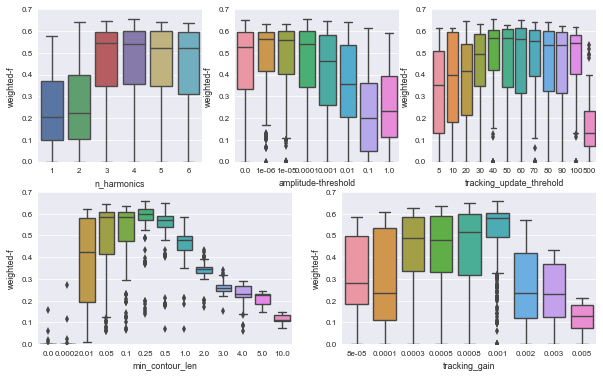

In [174]:
c1, c2, c3, c4, c5 = sns.color_palette('deep', 5)
col = 'weighted-f'
spp = figure.SubplotParams(
    left=None, bottom=None, right=None, top=None, wspace=None, hspace=None
)
plt.figure(figsize=(10, 6), subplotpars=spp)

plt.subplot(2, 3, 1)
sns.boxplot(x='n_harmonics', y=col, data=df)

plt.subplot(2, 3, 2)
sns.boxplot(x='amplitude-threshold', y=col, data=df)

plt.subplot(2, 3, 3)
sns.boxplot(x='tracking_update_threhold', y=col, data=df)

plt.subplot(2, 2, 3)
sns.boxplot(x='min_contour_len', y=col, data=df)

plt.subplot(2, 2, 4)
sns.boxplot(x='tracking_gain', y=col, data=df)

plt.savefig('hll_tracking_params_boxplots.pdf', format='pdf', bbox_inches='tight')